https://github.com/GorkemKola/Bitcoin-Price-Prediction/blob/main/BitcoinPricePrediction/BitcoinPricePrediction.ipynb

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
from sklearn.metrics import accuracy_score

### **Loading data**

In [159]:
url = 'https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/data/saved_data.csv'
df = pd.read_csv(url, sep = ',')

In [161]:
df['Date'] = pd.to_datetime(df['Date'])

In [162]:
df = df.sort_values('Date').reset_index().drop(columns = 'index')

In [163]:
df = df[df['Date'] >= pd.to_datetime('2016-03-10')].reset_index().drop(columns = ['index'])

In [164]:
df.head()

,Date,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
0,2016-03-10,415.8,412.8,417.5,410.3,55.74,445273.0,1.584270e+11,688153.2065,426654988.0,...,11.75,0.0,0.0,0.00820,1272.8,15.549,4896.5,1989.57,16995.13,16852.35
1,2016-03-11,419.1,415.8,422.4,415.1,60.63,434658.0,1.584270e+11,622785.0375,398582424.0,...,11.95,0.0,0.0,0.00922,1259.4,15.605,4948.0,2022.19,17213.31,16938.87
2,2016-03-12,410.4,419.1,420.7,407.0,59.64,374730.0,1.584270e+11,575015.3611,331208848.0,...,12.92,0.0,0.0,0.00814,1259.4,15.605,4948.0,2022.19,17213.31,16938.87
3,2016-03-13,412.4,410.4,415.9,409.6,34.98,421585.0,1.584270e+11,629356.8647,334817852.0,...,15.07,0.0,0.0,0.00818,1259.4,15.605,4948.0,2022.19,17213.31,16938.87
4,2016-03-14,414.3,412.4,416.1,411.2,49.33,451902.0,1.584270e+11,719966.3224,437739524.0,...,12.50,0.0,0.0,0.00830,1245.1,15.521,4950.5,2019.64,17229.13,17233.75


**Đối tượng dự báo: BTC_close**




In [165]:
# show information of dataframe
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2594 entries, 0 to 2593
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        2594 non-null   datetime64[ns]
 1   BTC_close                   2594 non-null   float64       
 2   BTC_open                    2594 non-null   float64       
 3   BTC_high                    2594 non-null   float64       
 4   BTC_low                     2594 non-null   float64       
 5   BTC_volume                  2594 non-null   float64       
 6   Active_Addr_Cnt             2594 non-null   float64       
 7   Difficulty                  2594 non-null   float64       
 8   Mean_Block_Size(in_bytes)   2594 non-null   float64       
 9   Sum_Block_Weight            2594 non-null   float64       
 10  Total_Fees(USD)             2594 non-null   float64       
 11  Mean_Hashrate               2594 non-null   float64     

None

In [166]:
# Showing the sum of null values at columns in our data.
df.isnull().sum()

Date                          0
BTC_close                     0
BTC_open                      0
BTC_high                      0
BTC_low                       0
BTC_volume                    0
Active_Addr_Cnt               0
Difficulty                    0
Mean_Block_Size(in_bytes)     0
Sum_Block_Weight              0
Total_Fees(USD)               0
Mean_Hashrate                 0
Xfer_Cnt                      0
Mean_Tx_size(native_units)    0
ETH                           0
LTC                           0
DOGE                          0
XRP                           0
GOLD                          0
SILVER                        0
COPPER                        0
S&P500                        0
DJI                           0
JP225                         0
dtype: int64

### **Correlation**

In [167]:
df.corr()

<ipython-input-167-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,Total_Fees(USD),...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
BTC_close,1.000000,0.998583,0.999368,0.999242,-0.131214,0.657753,0.645857,0.465775,-0.015862,0.372550,...,0.934519,0.751535,0.804552,0.681927,0.717307,0.758319,0.888146,0.890631,0.848708,0.857846
BTC_open,0.998583,1.000000,0.999408,0.998904,-0.130077,0.656961,0.646251,0.465553,-0.016904,0.372173,...,0.934904,0.750891,0.806007,0.682380,0.716981,0.757605,0.888991,0.890660,0.848770,0.857939
BTC_high,0.999368,0.999408,1.000000,0.998782,-0.129976,0.659965,0.643698,0.466623,-0.012792,0.378014,...,0.933753,0.753873,0.805736,0.682934,0.715901,0.758417,0.888511,0.889060,0.847330,0.857492
BTC_low,0.999242,0.998904,0.998782,1.000000,-0.131920,0.653619,0.649969,0.465141,-0.021139,0.361968,...,0.936586,0.746874,0.804960,0.680701,0.719196,0.757167,0.888982,0.893212,0.850981,0.858389
BTC_volume,-0.131214,-0.130077,-0.129976,-0.131920,1.000000,0.043993,0.107670,0.166870,0.070247,-0.082706,...,-0.172315,-0.029551,-0.165731,-0.061616,0.056567,-0.172915,-0.121050,0.023577,0.105187,0.022090
Active_Addr_Cnt,0.657753,0.656961,0.659965,0.653619,0.043993,1.000000,0.622324,0.720534,0.550072,0.529615,...,0.542543,0.579044,0.409167,0.467338,0.695881,0.626971,0.641705,0.681667,0.679895,0.720763
Difficulty,0.645857,0.646251,0.643698,0.649969,0.107670,0.622324,1.000000,0.711999,-0.060051,0.058675,...,0.625845,0.308676,0.494193,0.307694,0.865393,0.639267,0.725995,0.847352,0.836903,0.802769
Mean_Block_Size(in_bytes),0.465775,0.465553,0.466623,0.465141,0.166870,0.720534,0.711999,1.000000,0.443248,0.233513,...,0.391815,0.307738,0.319537,0.236074,0.644120,0.487499,0.509512,0.585025,0.592721,0.583367
Sum_Block_Weight,-0.015862,-0.016904,-0.012792,-0.021139,0.070247,0.550072,-0.060051,0.443248,1.000000,0.357182,...,-0.102056,0.126915,-0.115871,0.009266,0.007767,0.063137,-0.041377,-0.087707,-0.076170,-0.025859
Total_Fees(USD),0.372550,0.372173,0.378014,0.361968,-0.082706,0.529615,0.058675,0.233513,0.357182,1.000000,...,0.194612,0.624570,0.189121,0.469549,0.145614,0.296005,0.261160,0.169439,0.190398,0.301349


In [168]:
df_corr = df.corr().iloc[:1,:]
df_corr

<ipython-input-168-1a9d6db2d601>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr().iloc[:1,:]


,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,Total_Fees(USD),...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
BTC_close,1.0,0.998583,0.999368,0.999242,-0.131214,0.657753,0.645857,0.465775,-0.015862,0.37255,...,0.934519,0.751535,0.804552,0.681927,0.717307,0.758319,0.888146,0.890631,0.848708,0.857846


<ipython-input-169-c1be2daee4ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


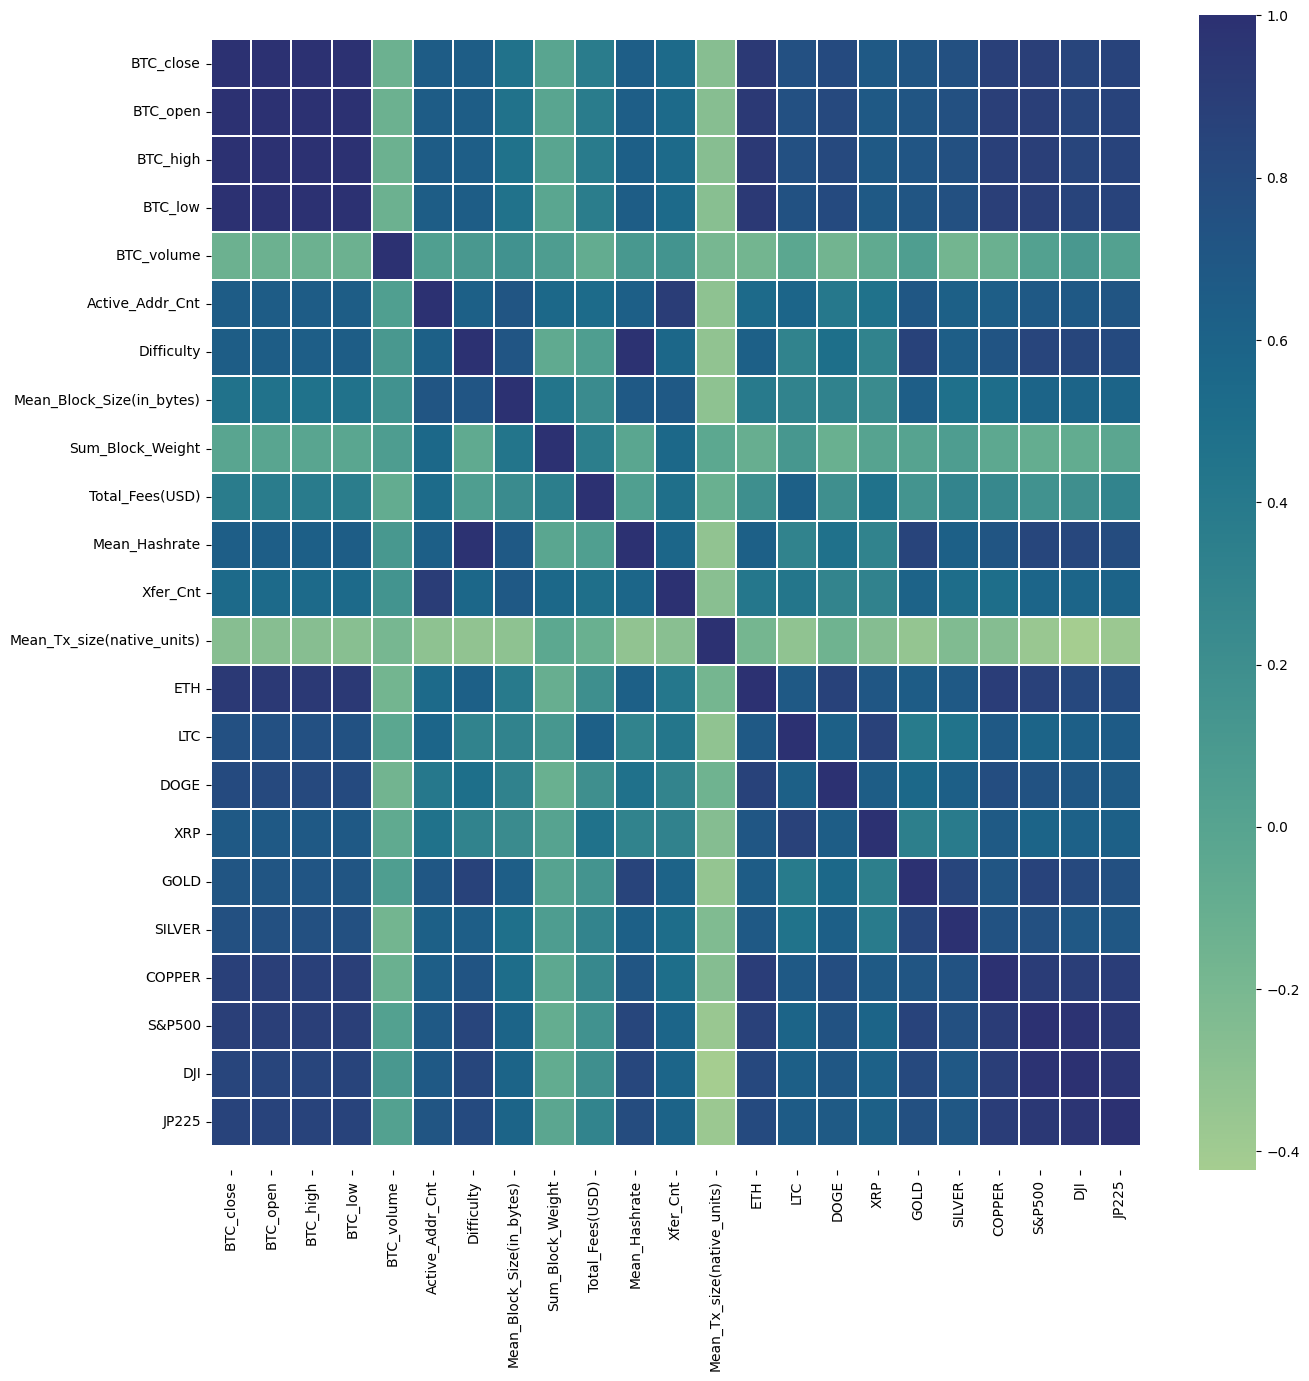

In [169]:
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(correlation_matrix, linewidths =.01, cmap = 'crest',linecolor='white',annot_kws={"size":8},ax=ax)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top - 0.5)
plt.show()

### **Normalization**

- a process that important in KNN - an algorithm that prediction based on calculating distance between data points.
- normalization: change all units and magnitudes to only one range to avoid bias to any features.
- In my programming, I choose MinMaxScaling method to normalize the data.

- formulas of Min Max Scaling: x_normalized = (x - min(x)) / (max(x) - min(x)
> scale data to a fixed range, between 0 and 1

In [170]:
scaler = MinMaxScaler()
df1 = df.drop("Date", axis = 1, inplace = False).drop("BTC_close", axis = 1, inplace = False)
X = df1.copy()
scaled = scaler.fit_transform(X)
display(scaled)

array([[6.85334585e-05, 1.02070426e-04, 1.24369055e-04, ...,
        0.00000000e+00, 0.00000000e+00, 1.20900899e-01],
       [1.13229192e-04, 1.73519724e-04, 1.97170452e-04, ...,
        1.16209890e-02, 1.10166770e-02, 1.26405388e-01],
       [1.62394499e-04, 1.48731192e-04, 7.43180936e-05, ...,
        1.16209890e-02, 1.10166770e-02, 1.26405388e-01],
       ...,
       [4.46647448e-01, 4.45528659e-01, 4.49304443e-01, ...,
        7.65257447e-01, 8.52844704e-01, 8.61520618e-01],
       [4.47916806e-01, 4.40011024e-01, 4.52076963e-01, ...,
        7.65257447e-01, 8.52844704e-01, 8.61520618e-01],
       [4.45333393e-01, 4.39410266e-01, 4.50951575e-01, ...,
        7.65257447e-01, 8.52844704e-01, 8.61520618e-01]])

### **Split data**

In [171]:
# 70/15/15
Y = pd.DataFrame()
Y = df['BTC_close']
# Y['Date'] = df['Date']
# Y = Y.values
X_train, X_test, Y_train, Y_test = train_test_split(scaled, Y, test_size=0.15, random_state=0,shuffle=False)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=15/85, random_state=0, shuffle=False)

In [172]:
train_date, test_date = train_test_split(df['Date'], test_size=0.15, random_state=0,shuffle=False)
train_date, valid_date = train_test_split(train_date, test_size=15/85, random_state=0, shuffle=False)

In [173]:
# test_date.values

In [174]:
# test = pd.DataFrame(test_date).reset_index().drop(columns = 'index')
# test_date = test.Date

In [175]:
# X_test

In [176]:
# test = pd.DataFrame(X_test).reset_index().drop(columns = 'index')
# X_test = test.values

In [177]:
# Y_test

In [178]:
# test = pd.DataFrame(Y_test).reset_index().drop(columns = 'index')
# Y_test = test.values

In [179]:
print("x_train:",X_train.shape), print("y_train: ",Y_train.shape)
print("x_valid: ",X_valid.shape), print("y_valid: ",Y_valid.shape)
print("x_test: ",X_test.shape), print("y_test: ",Y_test.shape)

x_train: (1815, 22)
y_train:  (1815,)
x_valid:  (389, 22)
y_valid:  (389,)
x_test:  (390, 22)
y_test:  (390,)


(None, None)

# **Default**

In [180]:
neighbors = KNN()
neighbors.fit(X_train, Y_train)

KNeighborsRegressor()

#### **train set**

Metric:
Root Mean Square Error (RMSE): 515.7717562010989
Mean Absolute Percentage Error (MAPE): 0.04219833105383986
AUC test: 0.5270121278941565

Visualization:


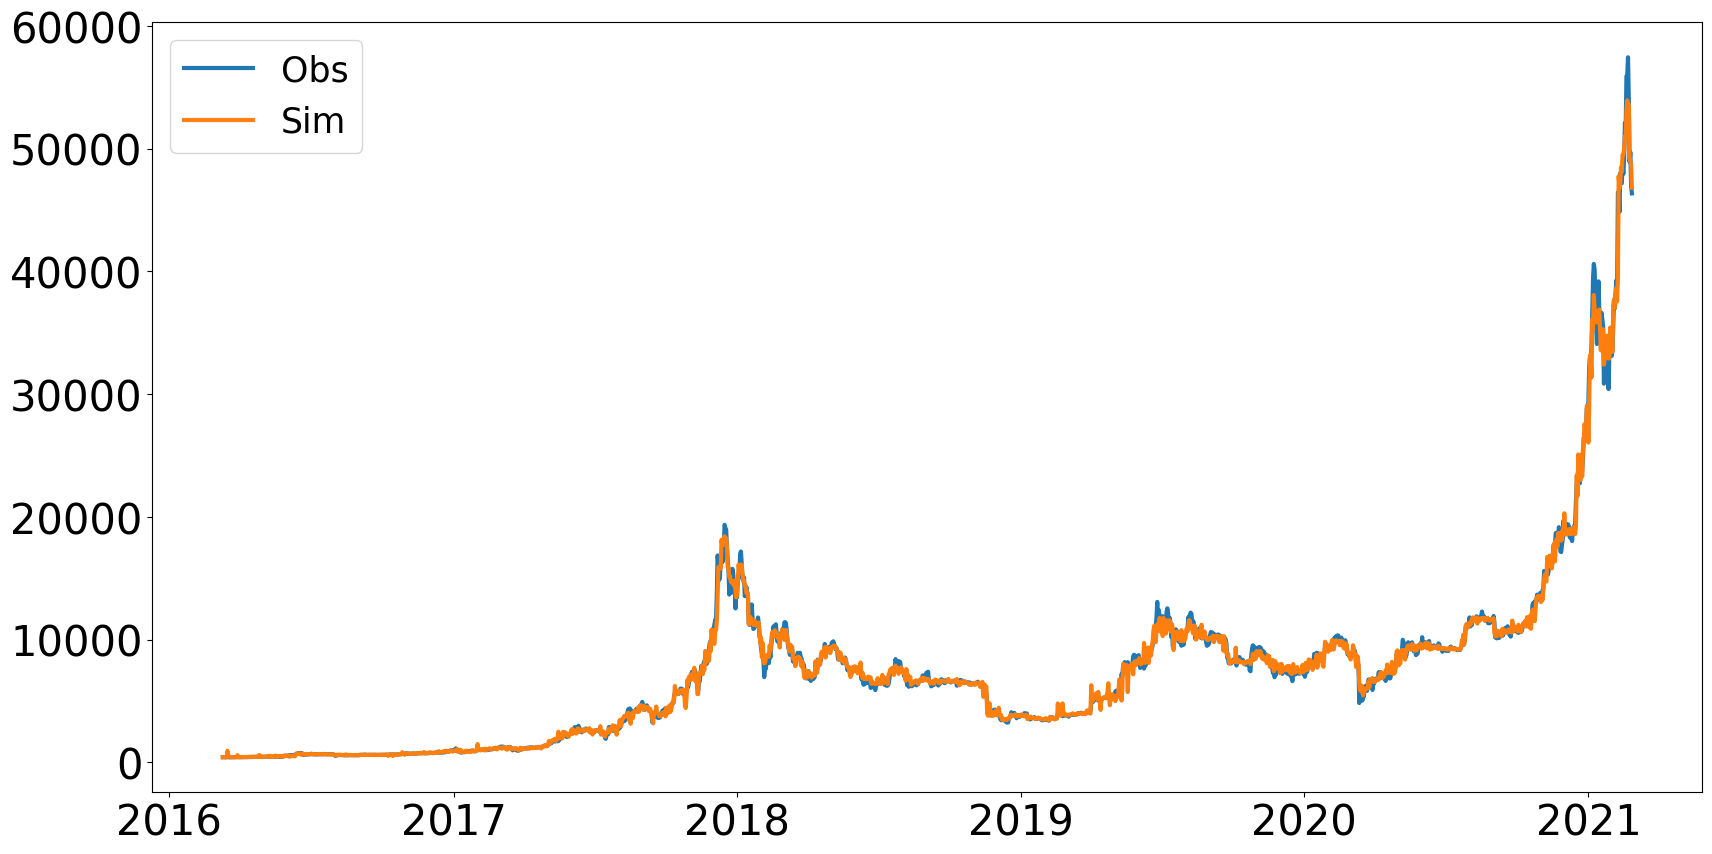

In [181]:
true_train = Y_train.copy()
prediction_train = neighbors.predict(X_train)

print('Metric:')
metric(true_train, prediction_train)
print('Visualization:')
plot(true_train, prediction_train, train_date)

### **test set**

Metric:
Root Mean Square Error (RMSE): 3836.45659375713
Mean Absolute Percentage Error (MAPE): 0.12868254783335656
AUC test: 0.4498714652956298

Visualization:


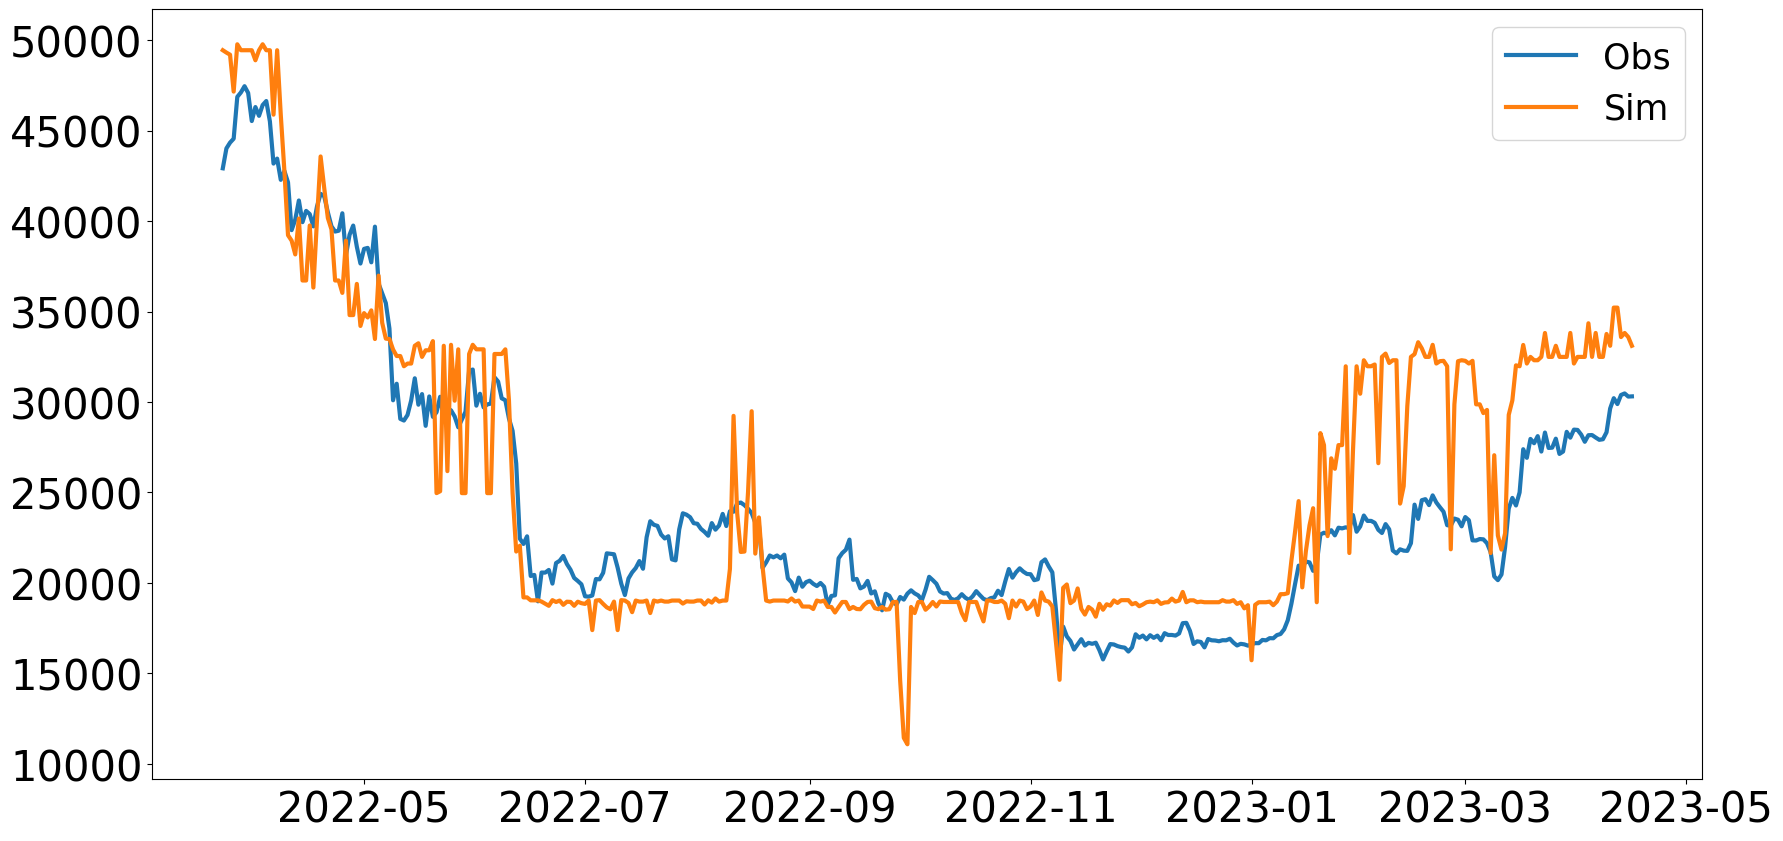

In [182]:
true_test = Y_test.copy()
prediction_test = neighbors.predict(X_test)

print('Metric:')
metric(true_test, prediction_test)
print('Visualization:')
plot(true_test, prediction_test, test_date)

# **Parameter tuning**

### **Grid search**

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

https://scikit-learn.org/stable/modules/grid_search.html


scoring:
https://scikit-learn.org/stable/modules/model_evaluation.html


In [183]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(1,40)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

# Create the kNN regressor
knn = KNeighborsRegressor()

# Perform grid search to find the best parameters
grid_search = GridSearchCV(knn,
                           param_grid,
                           scoring= 'neg_root_mean_squared_error', # metric
                           cv=5, # 5-fold cross validation
                           )
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error')

In [184]:
results = grid_search.cv_results_
# Extract the parameter combinations and corresponding scores
params = results['params']
scores = results['mean_test_score']

# Print the scores for each parameter combination
for param, score in zip(params, scores):
    print("Parameters:", param)
    print("Score:", score)
    print()

Parameters: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Score: -4068.4766341299605

Parameters: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
Score: -4068.4766341299605

Parameters: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Score: -4222.844705372157

Parameters: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
Score: -4222.844705372157

Parameters: {'algorithm': 'auto', 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
Score: -4030.3908051245794

Parameters: {'algorithm': 'auto', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Score: -4027.582865171341

Parameters: {'algorithm': 'auto', 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
Score: -4220.191110167334

Parameters: {'algorithm': 'auto', 'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
Score: -4217.13525917899

Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Score: -4014.9596029897048

Parameters: 

In [185]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)

{'algorithm': 'auto', 'n_neighbors': 32, 'p': 1, 'weights': 'distance'}


## Evaluate the best model on the train and test set


In [186]:

def AUC(true_test,prediction_test):
    true_test = np.array(true_test)
    prediction_test = np.array(prediction_test)
    count = 0
    for i in range(1,len(true_test)):
        if (true_test[i] - true_test[i-1]) * (prediction_test[i] - prediction_test[i-1]) > 0:
            count += 1
    return count/(len(true_test)-1)

def metric(true, predict):
  #RMSE
  print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(true, predict)))
  #MAPE
  print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(true,predict))
  #AUC
  print("AUC test:",AUC(true,predict))
  print()

def plot(true, predict, date):
    D = pd.DataFrame()
    D['Date'] = date
    D['Obs'] = true
    D['Sim'] = predict
    D = D.sort_values('Date').reset_index().drop(columns = 'index')

    fig = plt.figure(figsize = (20,10))
    plt.plot(D['Date'], D['Obs'].values, label = 'Obs', linewidth=3)
    plt.plot(D['Date'], D['Sim'] , label = 'Sim', linewidth=3)
    # plt.title('%s'%k)
    plt.legend(fontsize=25)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize =30)
    # plt.savefig('/content/drive/MyDrive/Tài liệu học tập/Machine learning/Project/Result/Manhattan/Manhattan_k_'+str(k)+'.png')
    plt.show()

### train set

In [187]:
print(X_train.shape)
print(Y_train.shape)

(1815, 22)
(1815,)


Metric:
Root Mean Square Error (RMSE): 0.0
Mean Absolute Percentage Error (MAPE): 0.0
AUC test: 0.9977949283351709

Visualization:


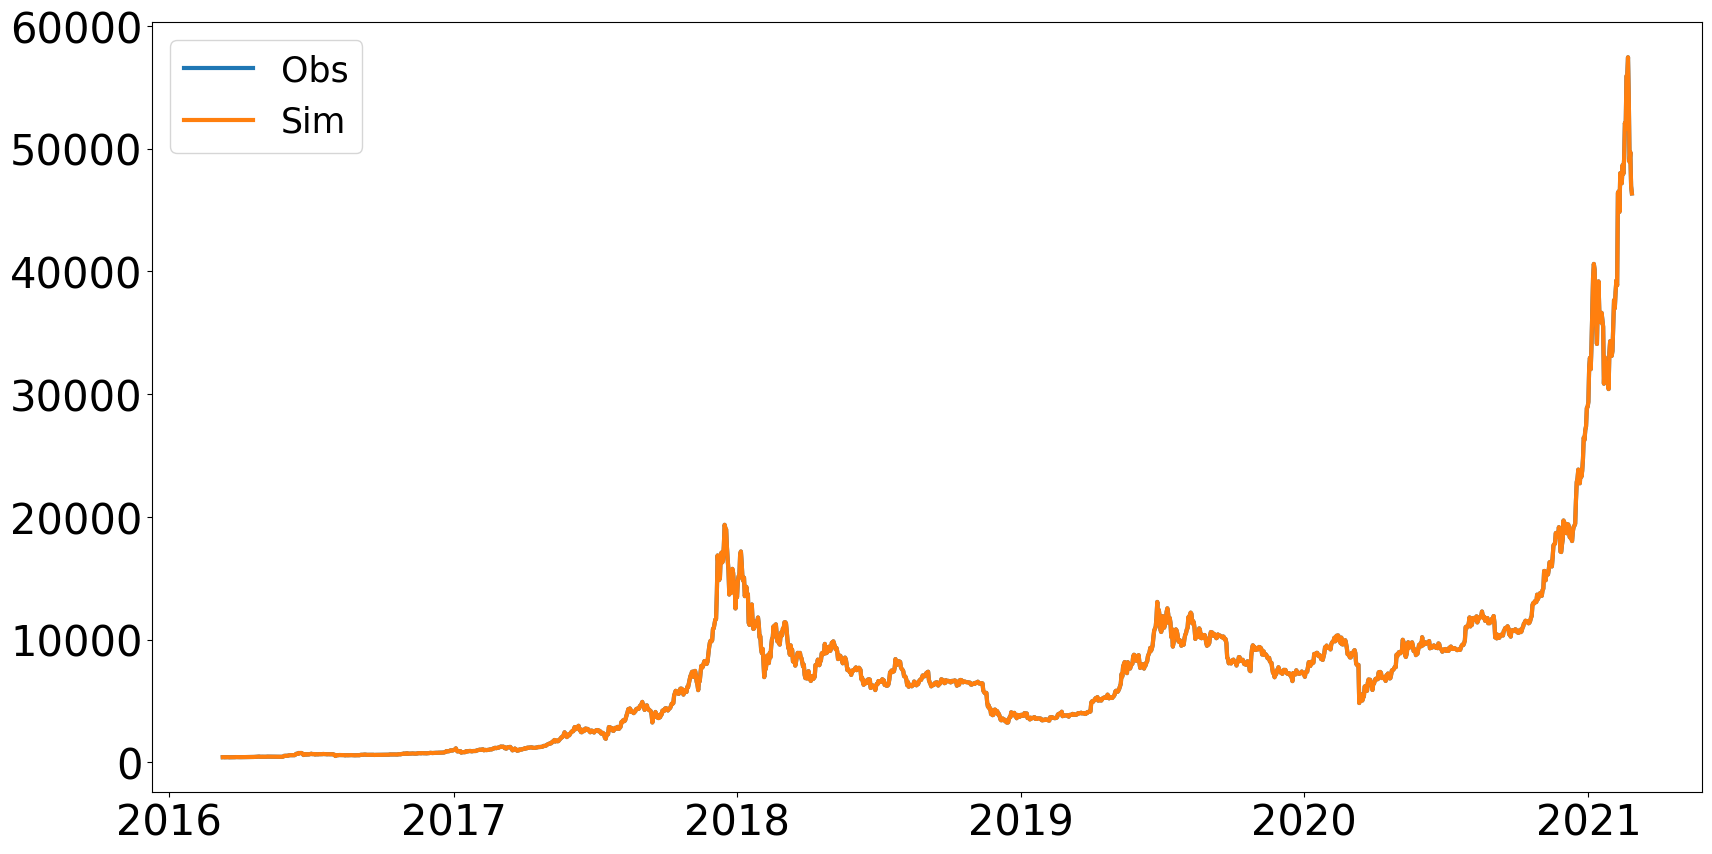

In [188]:
true_train = Y_train.copy()
prediction_train = best_model.predict(X_train)

print('Metric:')
metric(true_train, prediction_train)
print('Visualization:')
plot(true_train, prediction_train, train_date)

### test set

In [189]:
print(X_test.shape)
print(Y_test.shape)

(390, 22)
(390,)


Metric:
Root Mean Square Error (RMSE): 1955.603052594194
Mean Absolute Percentage Error (MAPE): 0.0654363908527324
AUC test: 0.519280205655527

Visualization:


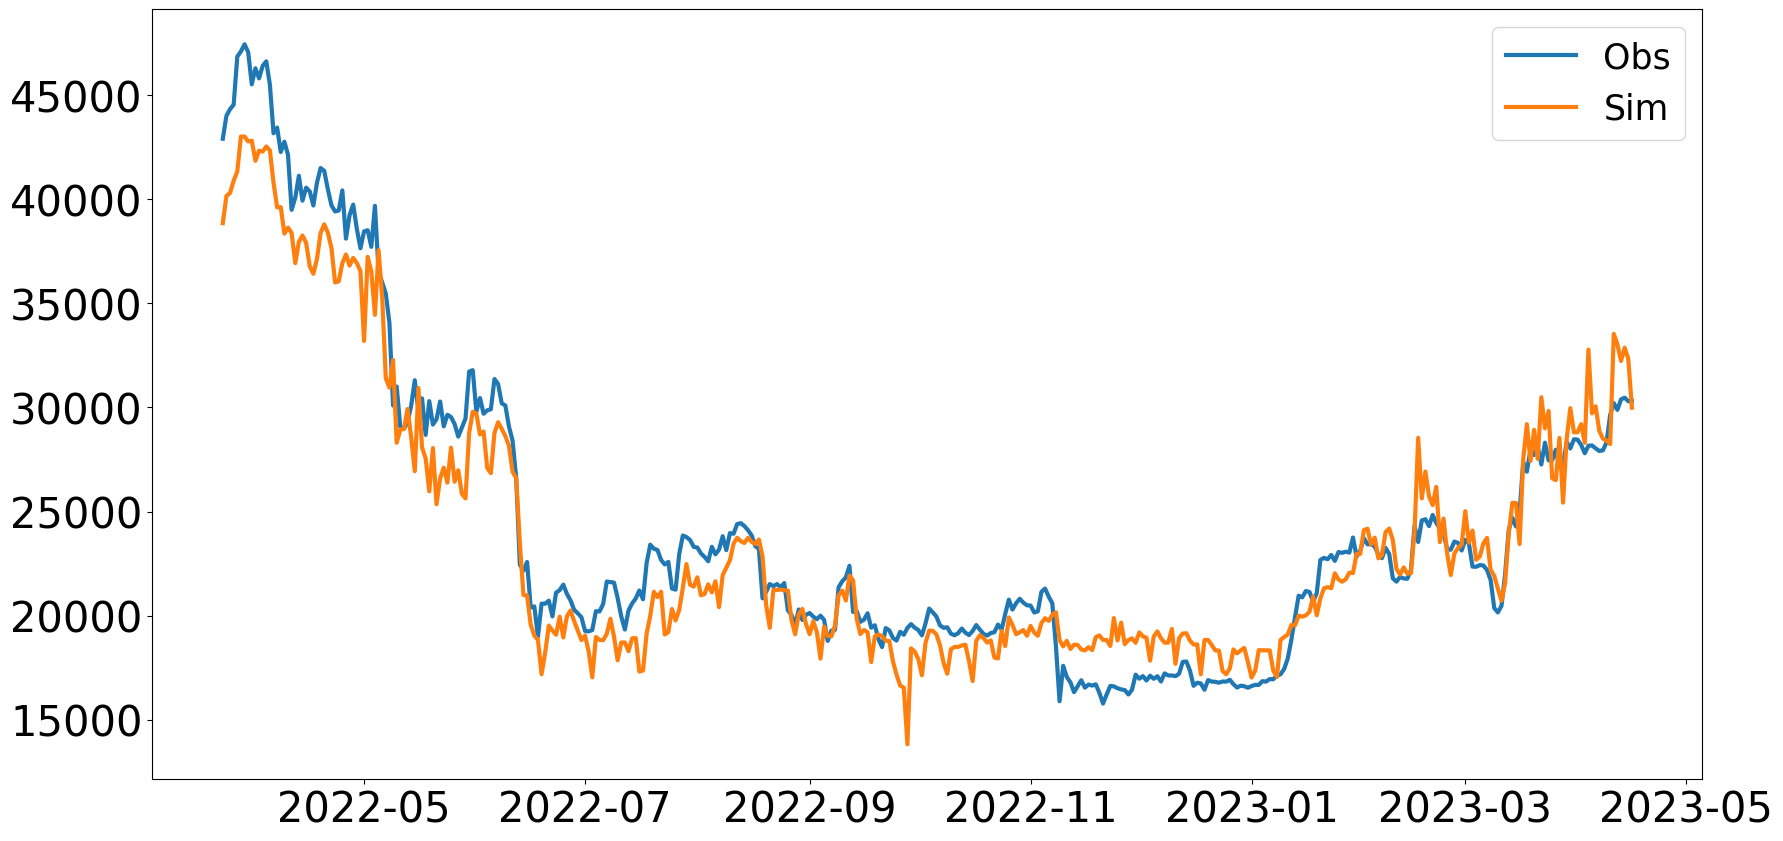

In [190]:
true_test = Y_test.copy()
prediction_test = best_model.predict(X_test)
print('Metric:')
metric(true_test, prediction_test)
print('Visualization:')
plot(true_test, prediction_test, test_date)